# Patient LoS Prediction

## 1. Importing the dataset and relevant libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from copy import deepcopy

health_df = pd.read_csv('data_source\LengthOfStay.csv')
#health_df.set_index("eid", inplace=True)

## 2. Data pre-processing

In [47]:
print(f'There dataset has {health_df.shape[0]} records and {health_df.shape[1]} features.\n')

There dataset has 100000 records and 29 features.



| Index | Data Field | Type | Description |
|:-----:|:----------:|:----:|:-----------:|
| 1     | eid        | Integer | Unique Id of the hospital admission |
| 2     | vdate      | String | Visit date |
| 3     | rcount     | Integer | Number of readmissions within last 180 days |
| 4     | gender     | String | Gender of the patient - M or F |
| 5     | dialysisrenalendstage | String | Flag for renal disease during encounter |
| 6     | asthma     | String | Flag for asthma during encounter |
| 7     | irondef    | String | Flag for iron deficiency during encounter |
| 8     | pneum      | String | Flag for pneumonia during encounter |
| 9     | substancedependence | String | Flag for substance dependence during encounter |
| 10    | psychologicaldisordermajor | String | Flag for major psychological disorder during encounter |
| 11    | depress    | String | Flag for depression during encounter |
| 12    | psychother | String | Flag for other psychological disorder during encounter |
| 13    | fibrosisandother | String | Flag for fibrosis during encounter |
| 14    | malnutrition | String | Flag for malnutrition during encounter |
| 15    | hemo       | String | Flag for blood disorder during encounter |
| 16    | hematocrit | Float | Average hematocrit value during encounter (g/dL) |
| 17    | neutrophils | Float | Average neutrophils value during encounter (cells/microL) |
| 18    | sodium     | Float | Average sodium value during encounter (mmol/L) |
| 19    | glucose    | Float | Average glucose value during encounter (mmol/L) |
| 20    | bloodureanitro | Float | Average blood urea nitrogen value during encounter (mg/dL) |
| 21    | creatinine | Float | Average creatinine value during encounter (mg/dL) |
| 22    | bmi        | Float | Average BMI during encounter (kg/m2) |
| 23    | pulse      | Float | Average pulse during encounter (beats/m) |
| 24    | respiration | Float | Average respiration during encounter (breaths/m) |
| 25    | discharged | String | Date of discharge |
| 26    | facid      | Integer | Facility ID at which the encounter occurred |
| 27    | lengthofstay | Integer | Length of stay for the encounter |

In [3]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   vdate                       100000 non-null  object 
 1   rcount                      100000 non-null  object 
 2   gender                      100000 non-null  object 
 3   dialysisrenalendstage       100000 non-null  int64  
 4   asthma                      100000 non-null  int64  
 5   irondef                     100000 non-null  int64  
 6   pneum                       100000 non-null  int64  
 7   substancedependence         100000 non-null  int64  
 8   psychologicaldisordermajor  100000 non-null  int64  
 9   depress                     100000 non-null  int64  
 10  psychother                  100000 non-null  int64  
 11  fibrosisandother            100000 non-null  int64  
 12  malnutrition                100000 non-null  int64  
 13  hemo               

In [4]:
round(health_df.iloc[:,14:23].describe().T,1)

,count,mean,std,min,25%,50%,75%,max
hematocrit,100000.0,12.0,2.0,4.4,10.9,11.9,12.9,24.1
neutrophils,100000.0,10.2,5.4,0.1,7.7,9.4,11.5,245.9
sodium,100000.0,137.9,3.0,124.9,135.9,137.9,139.9,151.4
glucose,100000.0,142.0,30.0,-1.0,121.7,142.1,162.2,271.4
bloodureanitro,100000.0,14.1,13.0,1.0,11.0,12.0,14.0,682.5
creatinine,100000.0,1.1,0.2,0.2,1.0,1.1,1.2,2.0
bmi,100000.0,29.8,2.0,22.0,28.5,29.8,31.2,38.9
pulse,100000.0,73.4,11.6,21.0,66.0,73.0,81.0,130.0
respiration,100000.0,6.5,0.6,0.2,6.5,6.5,6.5,10.0


### 2.1 Formating Features
There are some columns with incorrect data types. Hence, they need to be corrected. 

In [5]:
health_df[health_df.duplicated()]

,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,facname,facapacity,lengthofstay
eid,,,,,,,,,,,,,,,,,,,,,


#### There are no missing values, neither duplicate rows in the dataset.

### Outliers

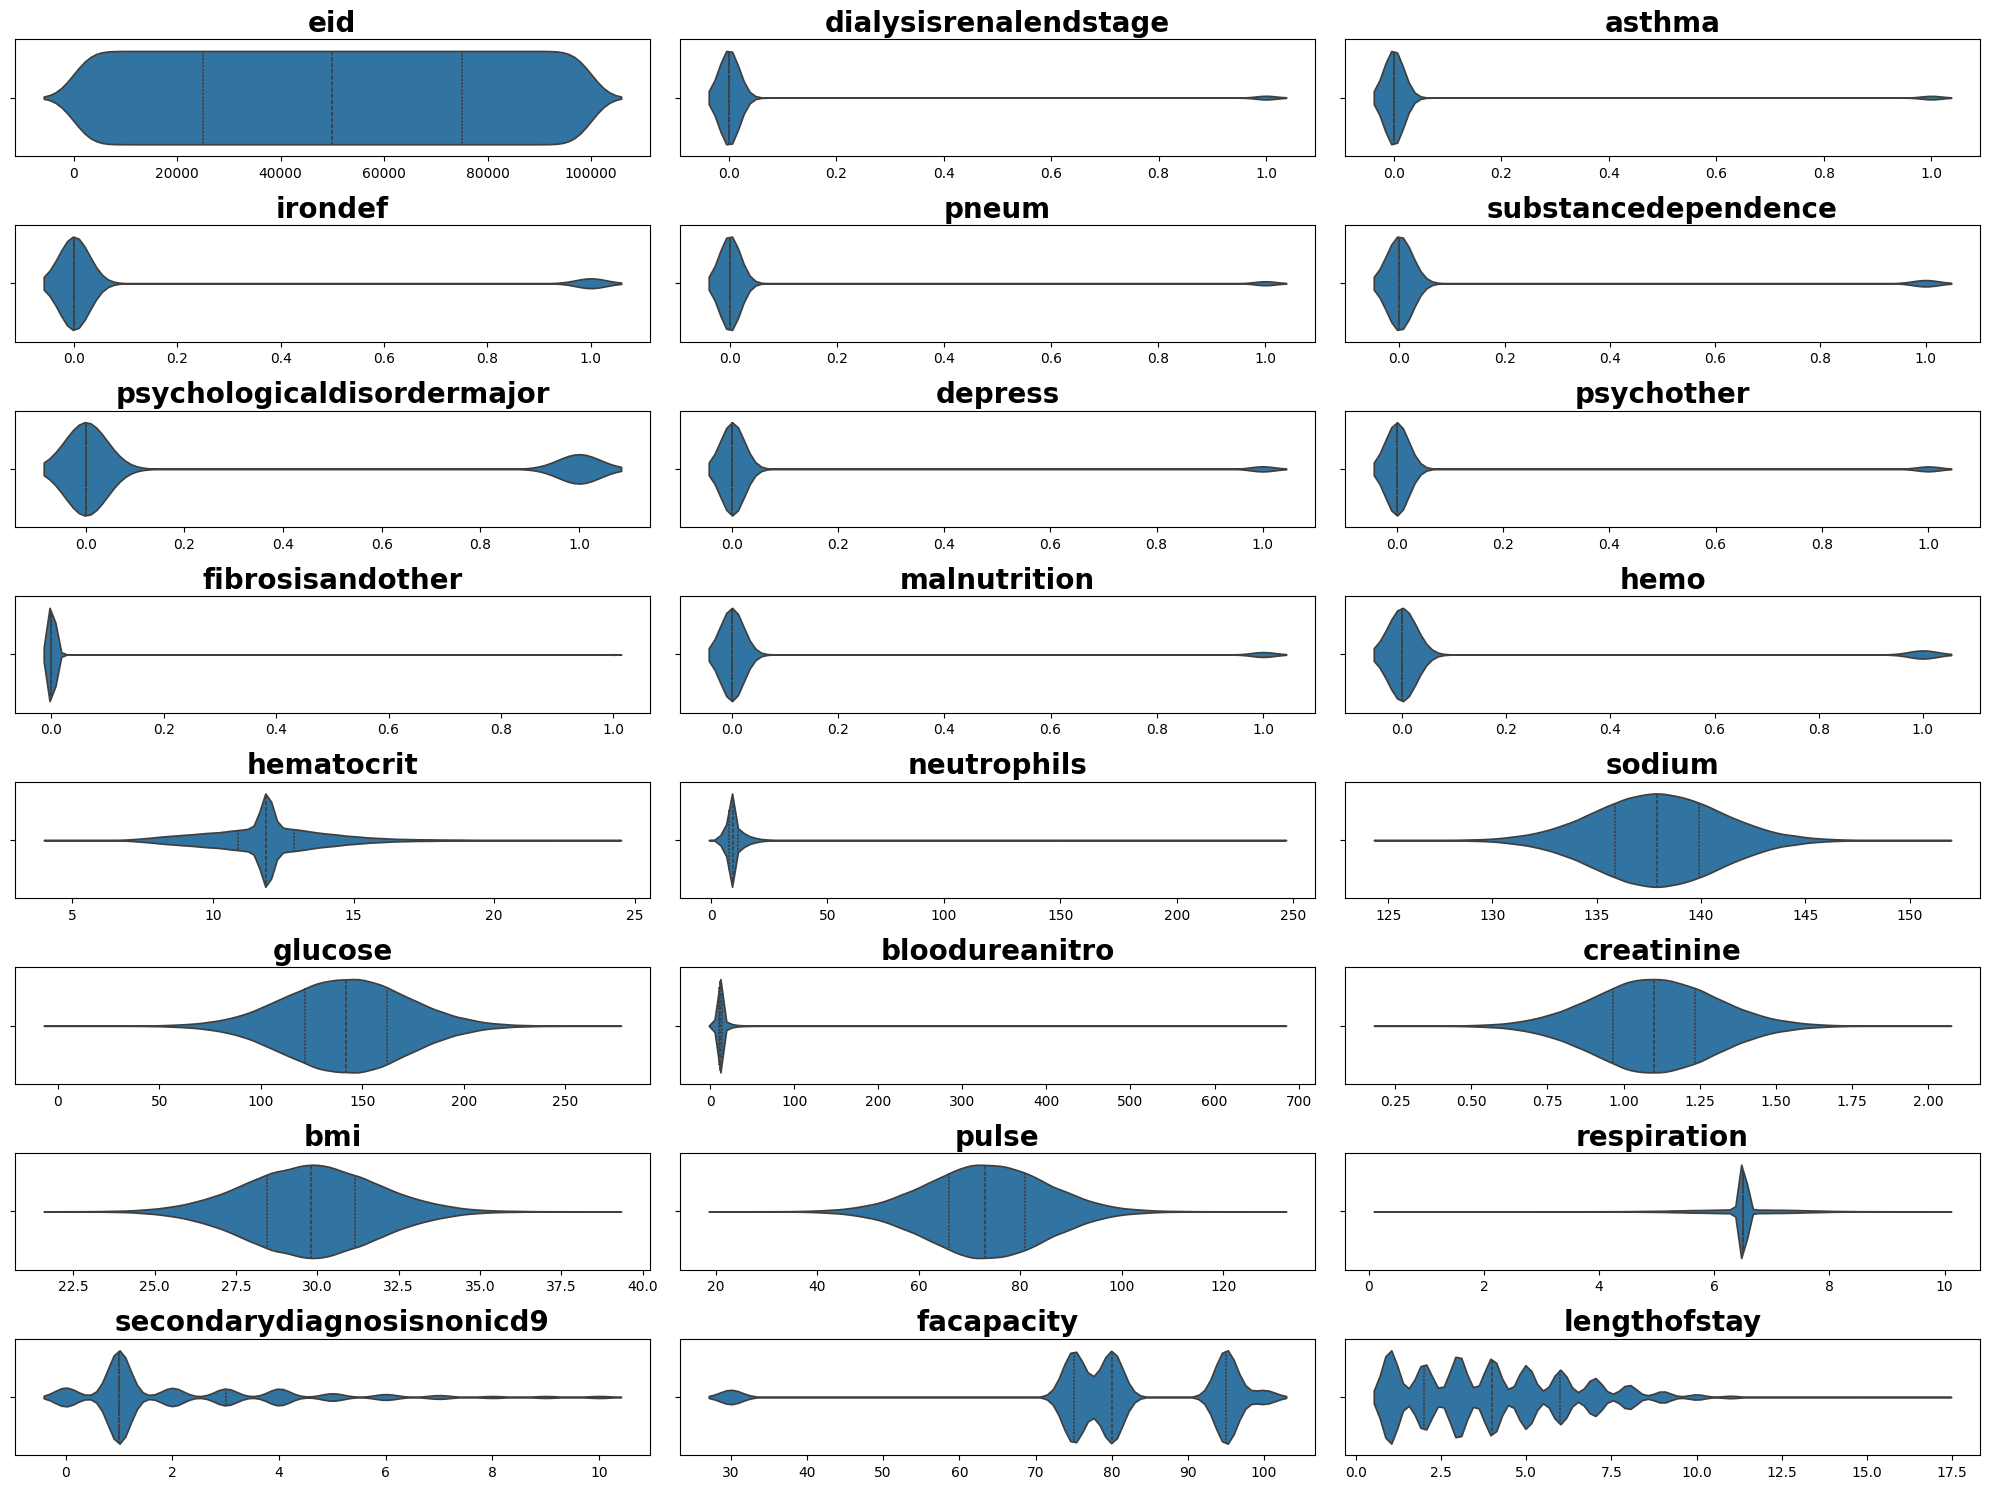

In [12]:
numerical_cols = health_df.select_dtypes(exclude=['object']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(8, 3, i) 
    sns.violinplot(x=health_df[col], inner='quartile')
    plt.title(col, fontsize=20, fontweight='bold')
    plt.xlabel('')

plt.tight_layout()
plt.show()


## Spliting Dataset

In [41]:
from sklearn.model_selection import train_test_split
X = health_df.drop(columns='lengthofstay')
y = health_df['lengthofstay']
through_X, validate_X, through_y, validate_y = train_test_split(X, y, stratify=y, test_size=0.2)
train_X, test_X, train_y, test_y = train_test_split(through_X, through_y,stratify=through_y, test_size=1./8)
train_X.shape, train_y.shape, test_X.shape, test_y.shape, validate_X.shape, validate_y.shape

((70000, 29), (70000,), (10000, 29), (10000,), (20000, 29), (20000,))

## Feature Engineering

### Feature Scaling

We start with identifying the distribution of each column in our dataset: 

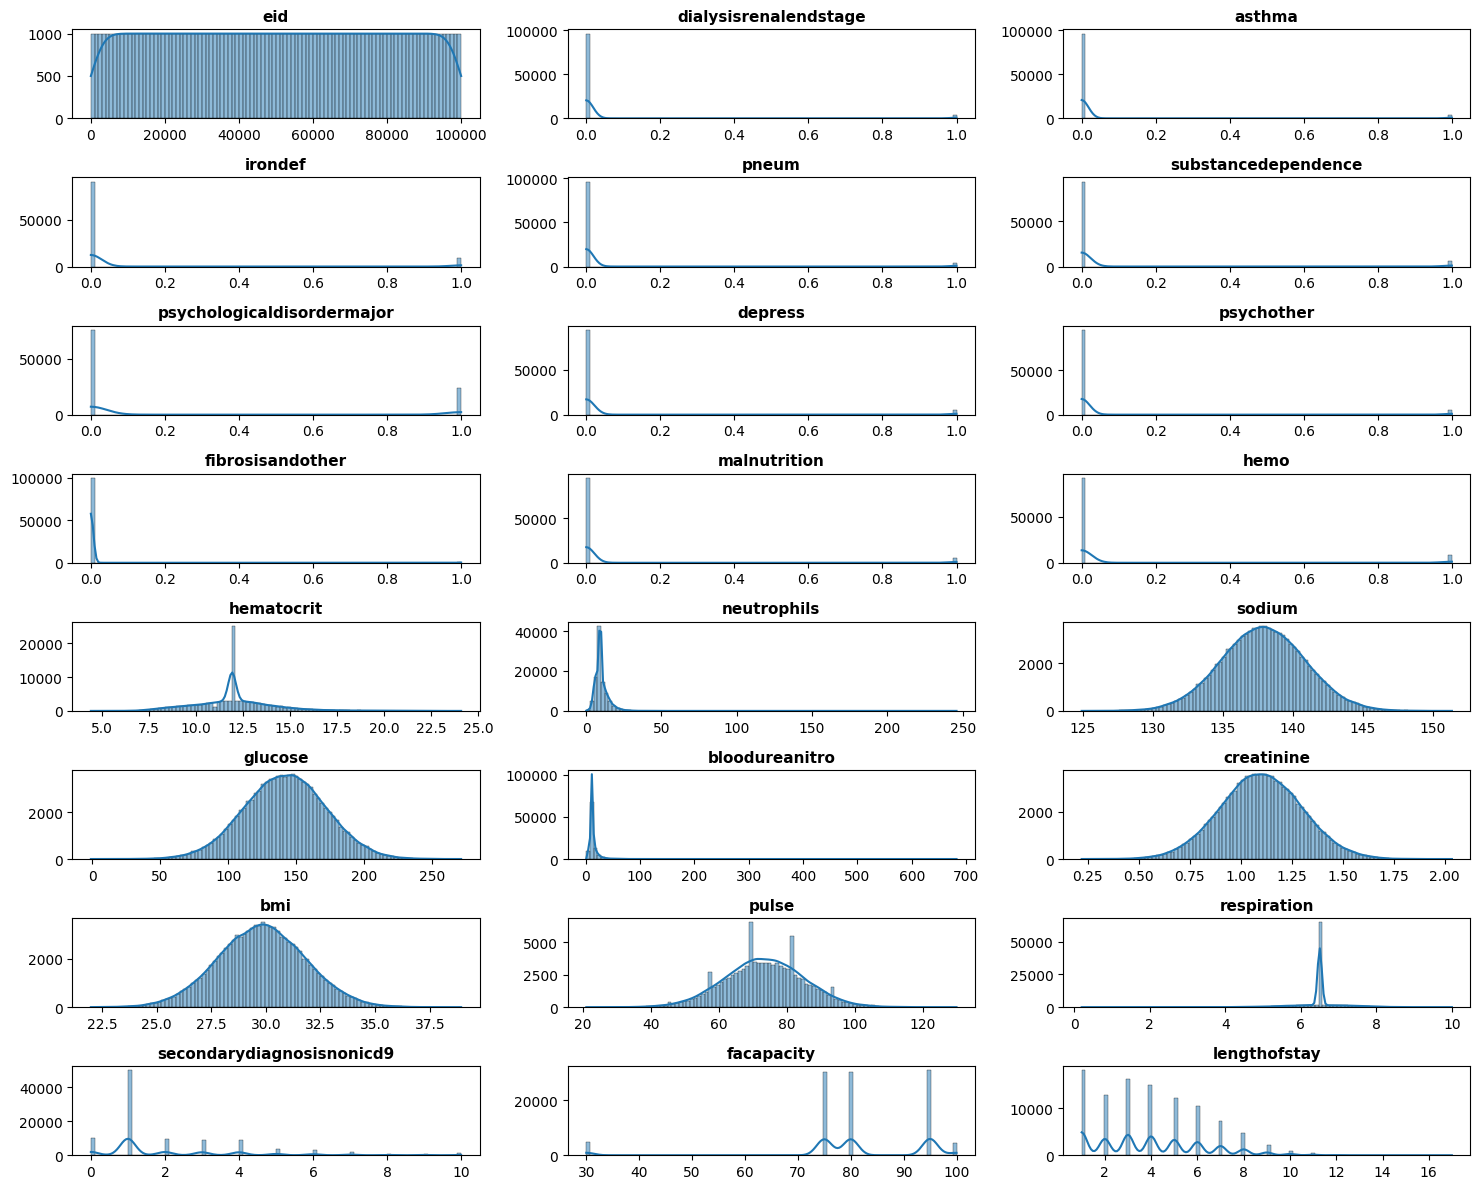

In [36]:
health_df_filtered = health_df #[health_df['pneum']==1]
numerical_cols = health_df_filtered.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(8, 3, i)
    sns.histplot(health_df_filtered[col], kde=True, bins=100)
    plt.title(col, fontsize=11, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer

from sklearn.pipeline import Pipeline

predictor = Pipeline ( steps= [
    ('scaler', StandardScaler())
])

In [43]:
predictor

Pipeline(steps=[('scaler', StandardScaler())])

### Feature Encoding

## Building Models

### Selecting top 3 performing models

### Building the Ensemble Learner

## Evaluations